In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load dataset

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/colaberry/Practical-Data-Science/master/Datasets/Advertising/Advertising.csv', usecols=[1,2,3,4])

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Visualize the dataset

In [7]:
sns.set_palette('coolwarm')

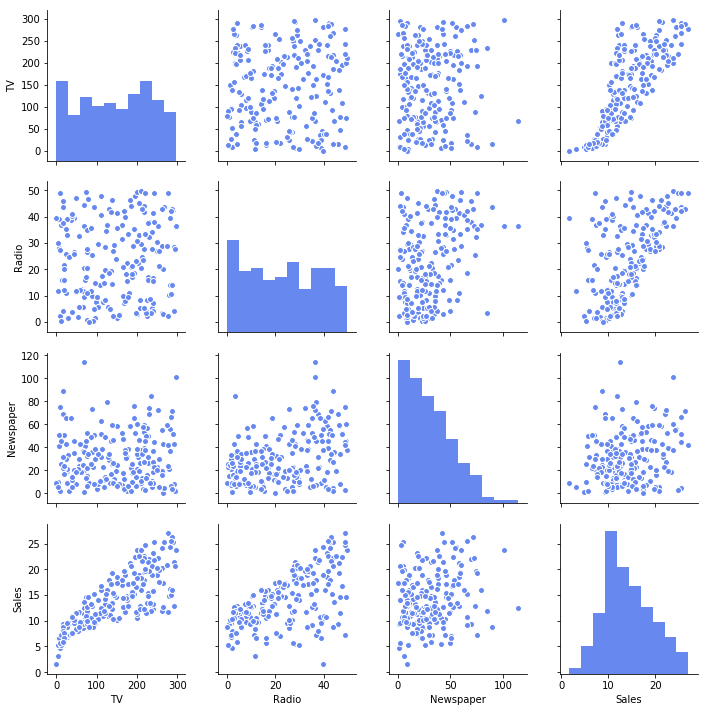

In [8]:
sns.pairplot(data)

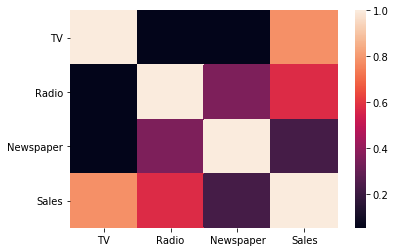

In [9]:
sns.heatmap(data.corr())

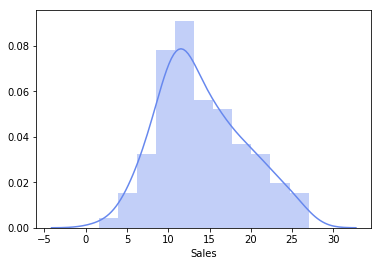

In [10]:
sns.distplot(data['Sales'])   #sales is the predicted value

## split data into training and testing

In [12]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
y=data['Sales']
x=data[['TV', 'Radio', 'Newspaper']]

In [14]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)

## Linear regression

In [16]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [17]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lm.coef_

array([0.0466301 , 0.19262514, 0.00298176])

In [19]:
lm.intercept_

2.4557031310944986

In [20]:
x_train.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [21]:
coef_df=pd.DataFrame(data=lm.coef_,index=x_train.columns,columns=['coeffvalues'])
coef_df

,coeffvalues
TV,0.046630
Radio,0.192625
Newspaper,0.002982


In [22]:
y_predictions=lm.predict(x_test)

Text(0,0.5,'predicted y_test values')

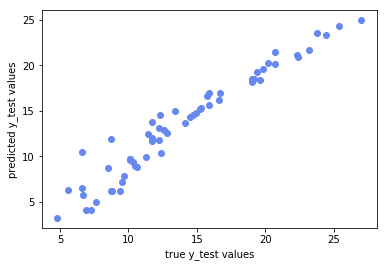

In [23]:
plt.scatter(y_test,y_predictions)
plt.xlabel('true y_test values')
plt.ylabel('predicted y_test values')

## Evaluation report

In [24]:
from scipy import stats

In [25]:
p=stats.linregress(y_test,y_predictions)
p

LinregressResult(slope=0.9963661096323241, intercept=-0.4087386095624499, rvalue=0.9686887953931652, pvalue=8.672098503496709e-37, stderr=0.03353197214552701)

In [26]:
r2value=np.sqrt(p.rvalue)
r2value

0.9842198917890073

In [27]:
pvalue=p.pvalue
print('%.40f' % pvalue) #overfit

0.0000000000000000000000000000000000008672


In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))
print('MSE:', metrics.mean_squared_error(y_test, y_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

MAE: 1.115947970871487
MSE: 2.180885861473783
RMSE: 1.4767822661021437


## Backward elimination method(for p value significance)

In [29]:
import statsmodels.formula.api as sm

In [30]:
ones=np.ones((200,1)).astype(int)

In [31]:
#x['ones']=ones
idx=0
x.insert(loc=idx, column='ones', value=ones) #to place ones in first column using loc=idx

In [32]:
#import statsmodels.api as sa
#x1=sa.add_constant(x)
#x1

In [33]:
x.head()

,ones,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,1,44.5,39.3,45.1
2,1,17.2,45.9,69.3
3,1,151.5,41.3,58.5
4,1,180.8,10.8,58.4


In [34]:
x.columns

Index(['ones', 'TV', 'Radio', 'Newspaper'], dtype='object')

In [36]:
x=x[['ones', 'TV', 'Radio', 'Newspaper']]
regress=sm.OLS(endog=y,exog=x).fit()
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 05 May 2018   Prob (F-statistic):           1.58e-96
Time:                        01:01:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x=x[['ones','TV', 'Radio']]
regress=sm.OLS(endog=y,exog=x).fit()
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 05 May 2018   Prob (F-statistic):           4.83e-98
Time:                        01:01:47   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Correlation matrix

In [39]:
cr=data.corr()
cr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## collinearity with eigenvalues

In [40]:
eigenvalues,eigenvectors=np.linalg.eig(data.corr())

In [41]:
eigenvalues #radio as very low eigenvalue indicates chances of collinearity 

array([2.11082834, 0.05396356, 1.15504673, 0.68016137])

In [42]:
eigenvectors

array([[-0.50296841, -0.56816315, -0.58055078,  0.29525277],
       [-0.46544538, -0.40769043,  0.48991638, -0.61410996],
       [-0.30950804,  0.01415102,  0.62062298,  0.72029969],
       [-0.659233  ,  0.71468797, -0.19434466, -0.12985805]])

In [43]:
eigenvectors[:,1] #low value for newspaper(0.01415102) with respective radio(:,1) indicates multicollinearity

array([-0.56816315, -0.40769043,  0.01415102,  0.71468797])

# Lasso regression

In [45]:
from sklearn.linear_model import Lasso

In [66]:
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
print(lasso.coef_)
print(lasso.intercept_)

[0.04647494 0.18845584 0.00175457]
2.6156013249875674


In [78]:
coef_df=pd.DataFrame(data=lasso.coef_,index=x_train.columns,columns=['coeffvalues'])
coef_df

,coeffvalues
TV,0.046475
Radio,0.188456
Newspaper,0.001755


In [68]:
y_predictions=lasso.predict(x_test)

Text(0,0.5,'predicted y_test values')

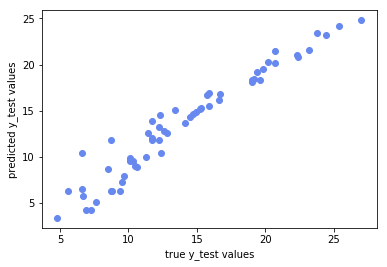

In [69]:
plt.scatter(y_test,y_predictions)
plt.xlabel('true y_test values')
plt.ylabel('predicted y_test values')

In [79]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))
print('MSE:', metrics.mean_squared_error(y_test, y_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

MAE: 1.1102137939779482
MSE: 2.118808675118121
RMSE: 1.4556128177225292
